In [2]:
import pandas as pd
import scipy.io

# Step 1: Read the CSV file
csv_file = 'C:\\Users\\hp\\Downloads\\archive\\cleaned_dataset\\metadata.csv'  
df = pd.read_csv(csv_file)

# Step 2: Convert DataFrame to a dictionary with the column names as keys
data_dict = {
    'start_time': df['start_time'].values,
    'ambient_temperature': df['ambient_temperature'].values,
    'battery_id': df['battery_id'].values,
    'test_id': df['test_id'].values,
    'uid': df['uid'].values,
    'filename': df['filename'].values,
    'Capacity': df['Capacity'].values,
    'Re': df['Re'].values,
    'Rct': df['Rct'].values
}

# Step 3: Save the dictionary as a .mat file
mat_file = 'C:\\Users\\hp\\Downloads\\archive\\cleaned_dataset\\metadata.mat'  # Path for the output .mat file
scipy.io.savemat(mat_file, data_dict)

print(f"Data saved to {mat_file}")


Data saved to C:\Users\hp\Downloads\archive\cleaned_dataset\metadata.mat


In [3]:
import scipy.io

# Load the .mat file
data = scipy.io.loadmat('C:\\Users\\hp\\Downloads\\archive\\cleaned_dataset\\metadata.mat') 

# Print all keys in the .mat file
print(data.keys())  # This will show all available variables in the .mat file


dict_keys(['__header__', '__version__', '__globals__', 'start_time', 'ambient_temperature', 'battery_id', 'test_id', 'uid', 'filename', 'Capacity', 'Re', 'Rct'])


C:\Users\hp\AppData\Local\Temp\ipykernel_10164\3071579074.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cleaned_data.append(float(entry))


Shape of Capacity: (1,)
Shape of Re: (1,)
Shape of Rct: (1,)
Shape of X: (1, 2)
Shape of y: (1,)


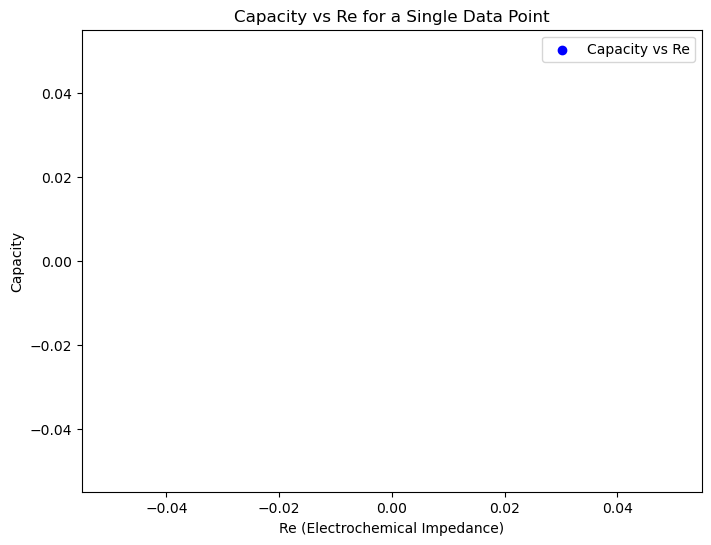

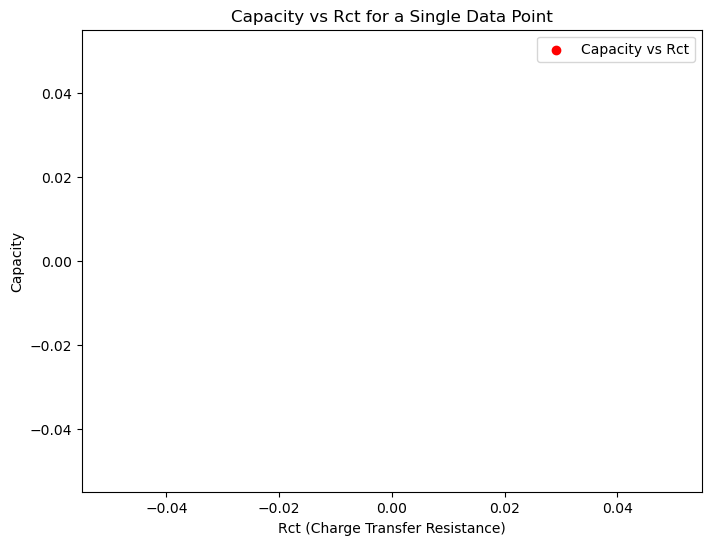

In [4]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Load the .mat data
data = scipy.io.loadmat('C:\\Users\\hp\\Downloads\\archive\\cleaned_dataset\\metadata.mat')  

# Extract relevant attributes from the loaded data
start_time = data['start_time']
ambient_temperature = data['ambient_temperature']
battery_id = data['battery_id']
test_id = data['test_id']
uid = data['uid']
filename = data['filename']
Capacity = data['Capacity']
Re = data['Re']
Rct = data['Rct']

# Step 2: Clean the data
# Clean the data to handle nested arrays or lists
def clean_data(data):
    cleaned_data = []
    for entry in data:
        try:
            # Check if entry is a list or array and try to extract scalar value
            if isinstance(entry, (np.ndarray, list)):
                # If it's a list/array, take the first element (or handle differently based on structure)
                entry = entry[0] if len(entry) > 0 else 0
            # Convert to float, skip if conversion fails
            cleaned_data.append(float(entry))
        except (ValueError, TypeError):
            # Skip invalid entries (strings, empty lists, etc.)
            continue
    return np.array(cleaned_data, dtype=np.float64)

# Clean and convert data
Capacity = clean_data(Capacity).flatten()
Re = clean_data(Re).flatten()
Rct = clean_data(Rct).flatten()

# Step 3: Check if the data is empty after cleaning
if len(Capacity) == 0 or len(Re) == 0 or len(Rct) == 0:
    raise ValueError("One or more of the datasets (Capacity, Re, Rct) are empty after cleaning.")

# Step 4: Check the shapes and lengths of the data
print(f"Shape of Capacity: {Capacity.shape}")
print(f"Shape of Re: {Re.shape}")
print(f"Shape of Rct: {Rct.shape}")

# Combine Re and Rct into feature matrix X
X = np.column_stack((Re, Rct))  # Combine Re and Rct into one feature matrix
print(f"Shape of X: {X.shape}")  # Should be (n_samples, 2)

# Flatten capacity data to match the target
y = Capacity  # Target is Capacity
print(f"Shape of y: {y.shape}")  # Should be (n_samples,)

# Ensure that X and y have consistent shapes
assert X.shape[0] == y.shape[0], f"Mismatch: X has {X.shape[0]} samples, but y has {y.shape[0]} samples"

# Step 5: Handle single sample case for plotting
if X.shape[0] <= 1:
    print("Warning: The dataset has 1 or fewer samples. Skipping train-test split and model training.")
    
    # Plot graph even with a single data point
    plt.figure(figsize=(8, 6))
    plt.scatter(Re, Capacity, color='blue', label='Capacity vs Re')
    plt.xlabel('Re (Electrochemical Impedance)')
    plt.ylabel('Capacity')
    plt.title('Capacity vs Re for a Single Data Point')
    plt.legend()
    plt.show()
    
    # Optional: Plot Capacity vs Rct (if relevant)
    plt.figure(figsize=(8, 6))
    plt.scatter(Rct, Capacity, color='red', label='Capacity vs Rct')
    plt.xlabel('Rct (Charge Transfer Resistance)')
    plt.ylabel('Capacity')
    plt.title('Capacity vs Rct for a Single Data Point')
    plt.legend()
    plt.show()

else:
    # Proceed with machine learning steps for larger datasets
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    plt.scatter(y_test, y_pred)
    plt.xlabel('True Capacity')
    plt.ylabel('Predicted Capacity')
    plt.title('True vs Predicted Capacity')
    plt.show()
